# Bishop 1.1: Polynomial Curve Fitting

A simple regression example as an introduction to various concepts in pattern recognition including overfitting, regularization, cross validation, model selection etc.

We generate a dataset by adding noise to the function $sin(2\pi x)$ <br>
x is taken to be in the range [0,1] <br>
the target t = $sin(2\pi x)$ + gaussian noise

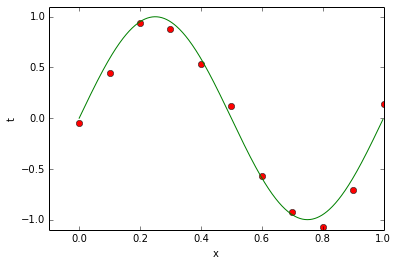

In [98]:
# Synthetic data generation
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
N = 11
#x = np.random.rand(N)
x = np.arange(N)*1.0/10
#gaussian_noise = np.random.normal(scale=0.1, size=N)
#y = np.sin(2*np.pi*x) + gaussian_noise
#we have fixed y - otherwise uncomment the above two lines
t = np.array([-0.05 ,  0.45,  0.94,  0.88,  0.53,
        0.12, -0.57, -0.92, -1.07, -0.71,
        0.14])
x_base = np.arange(0,1,0.002)
y_base = np.sin(2*np.pi*x_base)
plt.plot(x,t, 'ro', x_base, y_base, 'g')
plt.ylabel('t')
plt.xlabel('x')
plt.axis([-0.1, 1, -1.1, 1.1])
plt.show()


Green sine wave is the underlying function from which we generated the data points. <br>
Now we want to fit various polynomial models of the form y(x) = $\omega_0 + \omega_1x + \omega_2x^2+...+\omega_Mx^M$ to the data points. <br>
<i>Where M is the order of the polynomial</i>

##### M = 0

Fit y(x) = $\omega_0$ to the above data points
Find the best fit curve by minimizing sum of squared errors, $E(\omega) = $

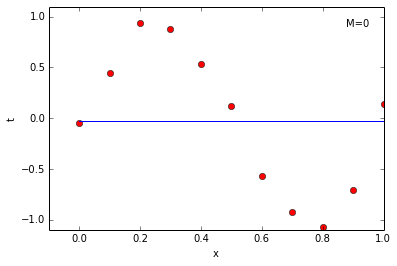

In [35]:
w0 = np.mean(t)
y0 = w0*np.ones_like(x_base)
plt.plot(x,t, 'ro', x_base, y0, 'b')
plt.ylabel('t')
plt.xlabel('x')
plt.axis([-0.1, 1, -1.1, 1.1])
plt.text(0.95, 0.9,'M=0', ha='right')
plt.show()



##### M = 1

Fit y(x) = $\omega_0 + \omega_1x$ to the above data points

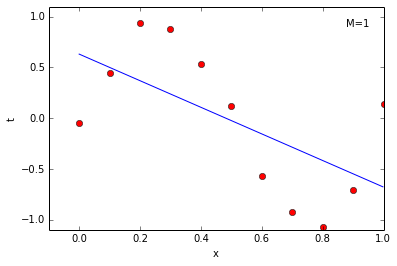

0.63181818327
-1.31090909381


In [46]:
from scipy.optimize import curve_fit

def func_1(x, w0, w1):
  return w1*x + w0 

popt, pcov = curve_fit(func_1, x, t, p0=(0,0))
w0 = popt[0]
w1 = popt[1]
# plot the line
y1 = w0 + w1*x_base
plt.plot(x,t, 'ro', x_base, y1, 'b')
plt.ylabel('t')
plt.xlabel('x')
plt.axis([-0.1, 1, -1.1, 1.1])
plt.text(0.95, 0.9,'M=1', ha='right')
plt.show()
print w0
print w1

##### Change the order from 0 to 10

[ -5.00000001e-02   6.31388095e+01  -1.65930298e+03   1.89107639e+04
  -1.14117259e+05   4.06476736e+05  -8.99609953e+05   1.25084325e+06
  -1.06241733e+06   5.03472222e+05  -1.01962081e+05]


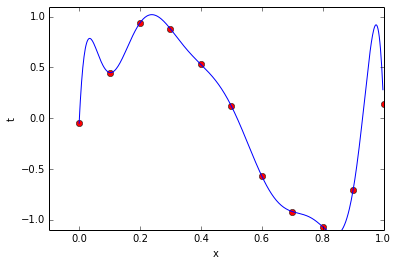

In [135]:
order = 10
def poly(a):
    # return [1 a a^2....a^order]
    return [a**i for i in range(order+1)]

X = np.array(map(poly, x))      
# solve least square problem
w = np.linalg.lstsq(X, t)[0]
print w
# plot the line
y3 = np.dot(np.array(map(poly, x_base)), w)
plt.plot(x,t, 'ro', x_base, y3, 'b')
plt.ylabel('t')
plt.xlabel('x')
plt.axis([-0.1, 1, -1.1, 1.1])
plt.show()

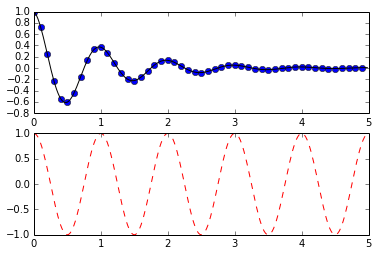

In [59]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


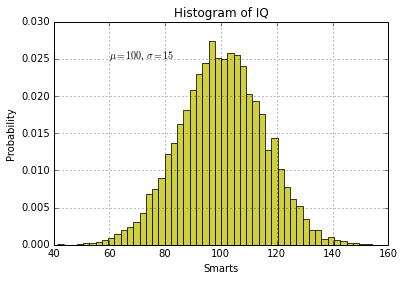

In [9]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='y', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [95]:
x = np.array([4,2,3])
order = 3
def poly(a):
    # return [1 a a^2....a^order]
    return [a**i for i in range(order)]

b = map(poly, x)
c = np.array(b)

print c        

[[ 1  4 16]
 [ 1  2  4]
 [ 1  3  9]]


In [94]:
order = 3
def poly(a):
    # return [1 a a^2....a^order]
    return [a**i for i in range(order)]

b = map(poly, [2,3])
c = np.array(b)
print c.shape

(2L, 3L)
